Загрузим датасет MNIST

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Визуализируем число

2


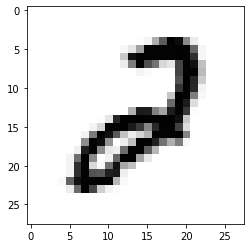

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 555
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

Форма набора данных

In [5]:
x_train.shape

(60000, 28, 28)

Чтобы иметь возможность использовать набор данных в Keras API, нам нужны массивы 4-dims numpy

Нормализуем данные

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Импортируем последовательную модель из Keras и добавим слои Conv2D, MaxPooling, Flatten, Dropout и Dense.

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Подберем модель

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2085 - accuracy: 0.9368
Epoch 2/4
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0832 - accuracy: 0.9741
Epoch 3/4
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0593 - accuracy: 0.9812
Epoch 4/4
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0437 - accuracy: 0.9855


Оценим модель

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0532 - accuracy: 0.9842


[0.05323036015033722, 0.9842000007629395]

Индивидуальный прогноз

[[4.5229814e-14 4.2657411e-10 1.4334673e-06 9.9997938e-01 5.3726108e-09
  5.5671845e-10 1.1516637e-14 1.9154446e-05 1.4672033e-08 4.4211323e-10]]


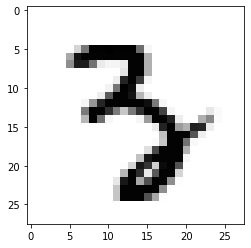

In [19]:
image_index = 87
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred)